In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# New Section

# New Section

In [5]:
!

In [6]:
import pandas as pd

In [7]:
dftest=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/loan_sanction_test.csv')

In [79]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/loan_sanction_train.csv')

In [11]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
362    360.0
363    360.0
364    360.0
365    360.0
366    180.0
Name: Loan_Amount_Term, Length: 367, dtype: float64

In [12]:
train.isna().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
train=train.dropna()
train.isnull().sum(), train.shape


(Loan_ID              0
 Gender               0
 Married              0
 Dependents           0
 Education            0
 Self_Employed        0
 ApplicantIncome      0
 CoapplicantIncome    0
 LoanAmount           0
 Loan_Amount_Term     0
 Credit_History       0
 Property_Area        0
 Loan_Status          0
 dtype: int64, (480, 13))

In [15]:
train.shape

(480, 13)

In [17]:
gender_counts = train.groupby('Gender')['Loan_Status'].count()


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


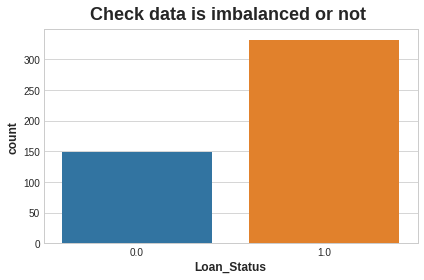

In [67]:
##### Check Data is imbalanced or not #####
plt.title('Check Data is imbalanced or not '.capitalize())
sns.countplot(train.loc[:, 'Loan_Status'])
plt.show()

In [83]:
#### Find the unique attribute of the categorical columns #####
for feature_ in train.dtypes[train.dtypes == 'object'].index:
  if feature_ == 'Loan_ID':
    continue
  else:
    print(f'{feature_} has unique attribue # ', train.loc[:, feature_].nunique())

Gender has unique attribue #  2
Married has unique attribue #  2
Dependents has unique attribue #  4
Education has unique attribue #  2
Self_Employed has unique attribue #  2
Property_Area has unique attribue #  3


In [82]:
##### Convert Loan_Status into Label Encoding #####
train.loc[:, 'Loan_Status'] = train.loc[:, 'Loan_Status'].map({'Y': 1, 'N': 0})

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [84]:

train.groupby(['Gender'])['Loan_Status'].agg(['count', 'sum', 'mean'])

,count,sum,mean
Gender,,,
Female,112,75,0.669643
Male,489,339,0.693252


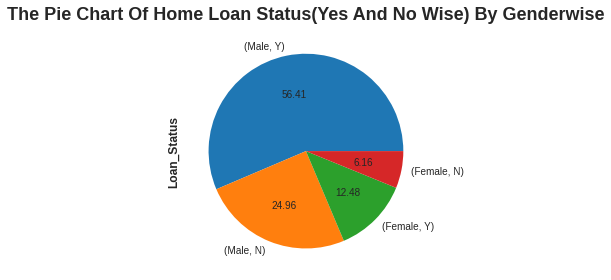

In [80]:
##### Plot the home loan status(Yes and No wise) by gender ####
plt.title('the Pie chart of home loan status(Yes and No wise) by genderwise'.title())
train.groupby(['Gender'])['Loan_Status'].value_counts().sort_values(ascending = False).plot(kind = 'pie', autopct='%.2f')
plt.show()

In [85]:
##### Find out, whats the ratio of taking load by gender and Maritial Status #####
print('the ratio of taking load by gender and Maritial Status'.title(),'\n')
train.pivot_table(index = 'Gender', columns = 'Married', values = 'Loan_Status', aggfunc = ['count', 'sum', 'mean'])



The Ratio Of Taking Load By Gender And Maritial Status 



count      sum           mean          
Married    No  Yes  No  Yes        No       Yes
Gender                                         
Female     80   31  51   23  0.637500  0.741935
Male      130  357  81  256  0.623077  0.717087

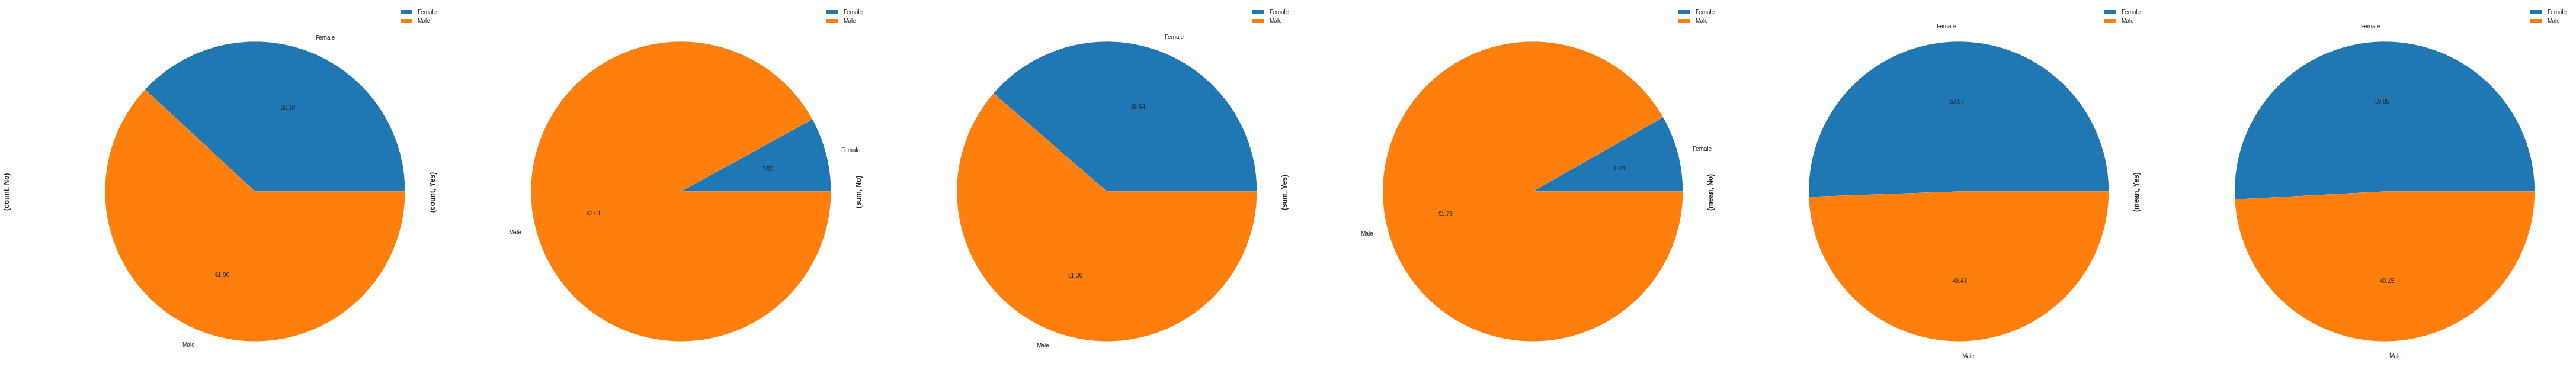

In [86]:
##### Plot it using pie #####
axes = train.pivot_table(index = 'Gender', columns = 'Married', values = 'Loan_Status',\
                            aggfunc = ['count', 'sum', 'mean']).plot(kind = 'pie', subplots = True,\
                            figsize = [60, 40], autopct='%.2f')
for ax in axes:
  ax.set_aspect('equal')
  ax.yaxis.set_label_coords(-0.15, 0.5)

plt.subplots_adjust(wspace = 0.5)
plt.show()

In [88]:
train['Dependents_'] = train.loc[:, 'Dependents'].map({'0': 'No', '1': 'One', '2': 'Two', '3+': 'Three_and_more'})

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,No
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,One
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,No
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,No
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,No


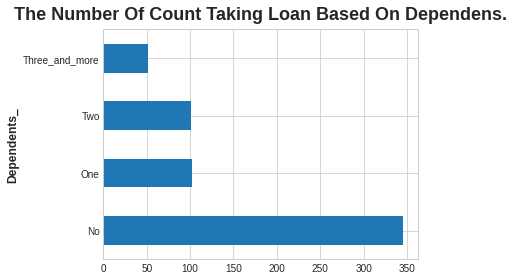

In [89]:
##### 'The number of count taking loan based on Dependens #####
plt.title('The number of count taking loan based on Dependens.'.title())
train.groupby(['Dependents_'])['Loan_Status'].count().sort_values(ascending = False).plot(kind = 'barh')
plt.show()

In [90]:
##### The number of count taking loan based on Dependens #####
train.groupby(['Dependents_'])[['Loan_Status']].count()

,Loan_Status
Dependents_,
No,345
One,102
Three_and_more,51
Two,101


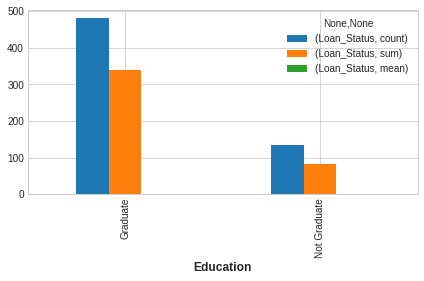

In [91]:
##### The ratio of taking loan by Education-wise #####
train.groupby(['Education'])[['Loan_Status']].agg(['count', 'sum', 'mean']).plot(kind = 'bar')
plt.show()

The Relationship Of Applicantincome With Education


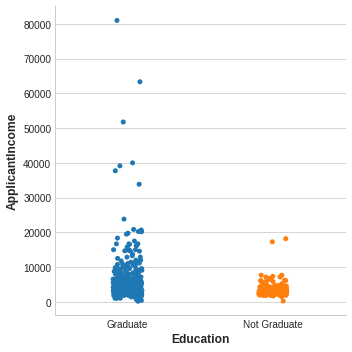

************************************************************************************************************************ 

The Relationship Of Applicantincome, Education With Self Employed


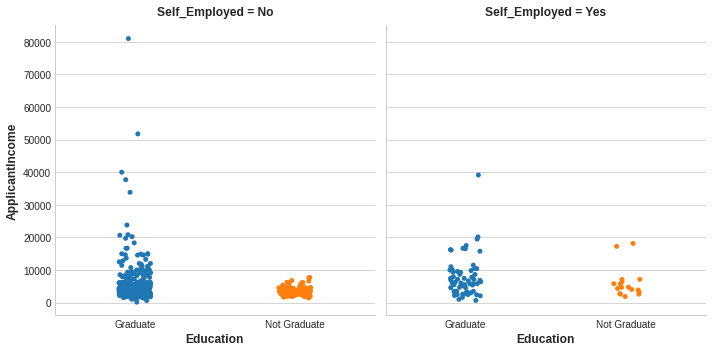

************************************************************************************************************************ 

The Relationship Of Applicantincome, Education With Self Employed


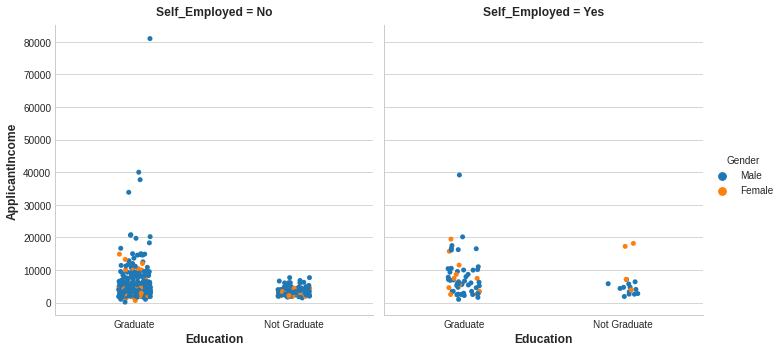

In [92]:
##### Plot the relationship of ApplicantIncome with Education #####
print('the relationship of ApplicantIncome with Education'.title())
sns.catplot(x = 'Education', y = 'ApplicantIncome', data = train)
plt.show()

print('*'*120,'\n')

##### Plot the relationship of ApplicantIncome, Education with Self Employed #####
print('the relationship of ApplicantIncome, Education with Self Employed'.title())
sns.catplot(x = 'Education', y = 'ApplicantIncome', col = 'Self_Employed', data = train)
plt.show()

print('*'*120,'\n')

##### Plot the relationship of ApplicantIncome, Education with Self Employed, Gender #####
print('the relationship of ApplicantIncome, Education with Self Employed'.title())
sns.catplot(x = 'Education', y = 'ApplicantIncome', col = 'Self_Employed', hue = 'Gender', data = train)
plt.show()

In [93]:
##### Describe of this dataset #####
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [94]:
##### Find the correlation of this dataset #####
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


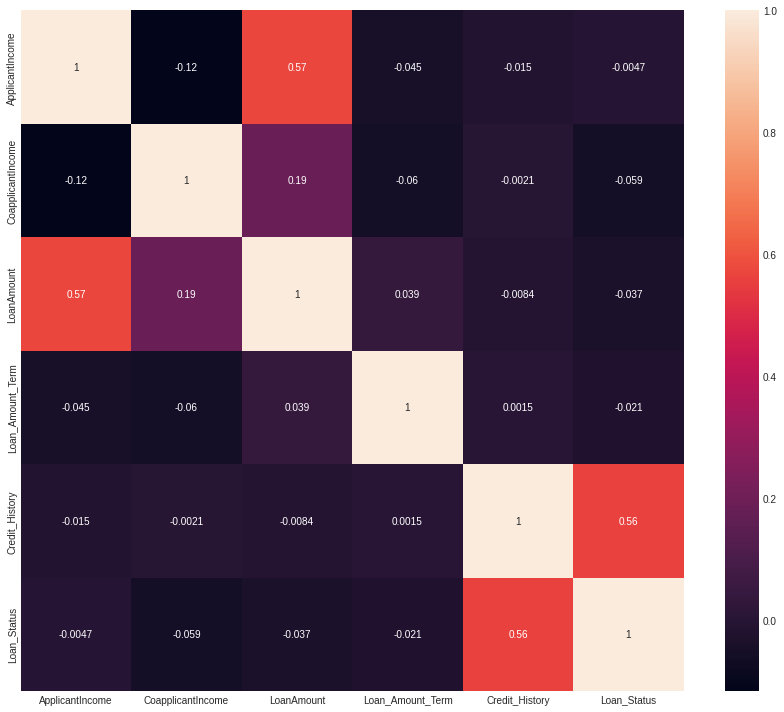

In [95]:
##### plot this corr() in a heatmap #####
plt.figure(figsize = (12, 10))
sns.heatmap(train.corr(), annot = True)
plt.show()

In [18]:
gender_counts

Gender
Female     86
Male      394
Name: Loan_Status, dtype: int64

In [17]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

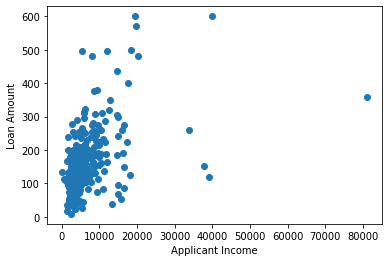

In [20]:
plt.scatter(train['ApplicantIncome'], train['LoanAmount'])
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

In [21]:
dftrain['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [22]:


# convert types
train['ApplicantIncome'] = (train['ApplicantIncome']).astype('float64')



In [23]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [26]:
# encode categorical features into binary
labels_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

le = LabelEncoder()

for label in labels_to_encode:
    train[label] = le.fit_transform(train[label])

In [27]:


# drop Loan_ID column
train.drop(labels='Loan_ID', inplace=True, axis=1)



In [28]:


train.head(10)



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417.0,4196.0,267.0,360.0,1.0,2,1
6,1,1,0,1,0,2333.0,1516.0,95.0,360.0,1.0,2,1
7,1,1,3,0,0,3036.0,2504.0,158.0,360.0,0.0,1,0
8,1,1,2,0,0,4006.0,1526.0,168.0,360.0,1.0,2,1
9,1,1,1,0,0,12841.0,10968.0,349.0,360.0,1.0,1,0
10,1,1,2,0,0,3200.0,700.0,70.0,360.0,1.0,2,1


In [29]:
# normalize data
cols_to_scale = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]

scaler = StandardScaler()

cols_to_scale = scaler.fit_transform(cols_to_scale)

In [30]:


# convert cols_to_scale to a dataframe to merge back in
cols_to_scale = pd.DataFrame(cols_to_scale)



In [31]:
# provide the feature names for cols_to_scale
cols_to_scale.columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [32]:
# drop unscaled columns
train.drop(labels=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1, inplace=True)


In [33]:


# merge cols_to_scale back into train
train = pd.concat([train, cols_to_scale], axis=1)



In [53]:
from sklearn.model_selection import train_test_split

X = train.drop(columns='Loan_Status')
y = train['Loan_Status']

X_train, X_val, y_train, y_val = train_test_split(X, 
                                                  y, 
                                                  test_size=0.2, 
                                                  random_state=142)


In [54]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

model = keras.Sequential([
    layers.Dense(32, activation='tanh', input_shape=[X_train.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(16, activation='tanh'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='tanh'),
    layers.Dropout(0.3),
    layers.Dense(16, activation='tanh'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

bce = BinaryCrossentropy()
model.compile(
    loss=bce,
    optimizer='adam',
    metrics=[bce] 
)

cp = ModelCheckpoint('model/', save_best_only=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[cp]
)

Epoch 1/100
8/8 [==============================] - 2s 33ms/step - loss: nan - binary_crossentropy: nan - val_loss: nan - val_binary_crossentropy: nan
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: nan - binary_crossentropy: nan - val_loss: nan - val_binary_crossentropy: nan
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: nan - binary_crossentropy: nan - val_loss: nan - val_binary_crossentropy: nan
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: nan - binary_crossentropy: nan - val_loss: nan - val_binary_crossentropy: nan
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: nan - binary_crossentropy: nan - val_loss: nan - val_binary_crossentropy: nan
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: nan - binary_crossentropy: nan - val_loss: nan - val_binary_crossentropy: nan
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: nan - binary_crossentropy: nan - v

In [55]:
# Quick sanity check with the shapes of Training and Testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(469, 11)
(469,)
(411, 10)
(411,)


Text(0.5, 1.0, 'Loss Function Graph')

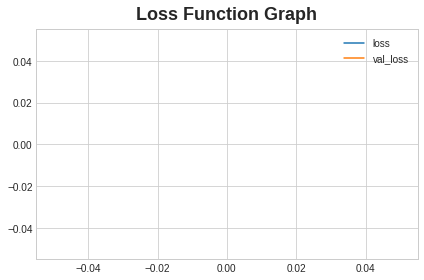

In [56]:


plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot().set_title('Loss Function Graph', fontsize=18)



In [64]:
from keras.layers import Activation, Dense, Dropout
##### Create a sequential model #####
model = Sequential()

##### Create first hidden layer with 64 neurons #####
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', input_dim = X_train.shape[1]))
model.add(Dropout(0.6))

##### Create second hidden layer with 32 neurons #####
model.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.5))

##### Create an output layer with sigmoid #####
model.add(Dense(units = 1, activation = 'sigmoid'))

##### Compile the model #####
model.compile(optimizer=  'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

##### Show the model summary #####
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 64)                768       
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________
